In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import csv

# Fetch the data
url = "https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/diabetes_scale"
df = pd.read_csv(url, sep = ' ', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333,NaN
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667,NaN
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333,NaN
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1,NaN
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6,NaN


In [2]:
df = df.drop(df.columns[9], axis=1)
df.head()

,0,1,2,3,4,5,6,7,8
0,-1,1:-0.294118,2:0.487437,3:0.180328,4:-0.292929,5:-1,6:0.00149028,7:-0.53117,8:-0.0333333
1,1,1:-0.882353,2:-0.145729,3:0.0819672,4:-0.414141,5:-1,6:-0.207153,7:-0.766866,8:-0.666667
2,-1,1:-0.0588235,2:0.839196,3:0.0491803,4:-1,5:-1,6:-0.305514,7:-0.492741,8:-0.633333
3,1,1:-0.882353,2:-0.105528,3:0.0819672,4:-0.535354,5:-0.777778,6:-0.162444,7:-0.923997,8:-1
4,-1,1:-1,2:0.376884,3:-0.344262,4:-0.292929,5:-0.602837,6:0.28465,7:0.887276,8:-0.6


In [3]:
# Remove the numbers before the colon in all columns except the "Label" and "NaN" columns
df.iloc[:, 1:9] = df.iloc[:, 1:9].apply(lambda x: x.str.split(':').str[1])

# Convert the columns to float64 data type
df.iloc[:, 1:9] = df.iloc[:, 1:9].astype(float)


In [4]:
df.iloc[:,0].value_counts()

 1    500
-1    268
Name: 0, dtype: int64

In [5]:
df = df.rename( columns= {0:'Outcome', 1:'Preganacies', 2:'Glucose', 3:'BloodPressure', 4:'SkinThickness',5:'Insulin',
                    6:'BMI', 7:'DiabetesPedFunc', 8:'Age'})

In [6]:
df

,Outcome,Preganacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedFunc,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [7]:
# See basic statistical details
df.describe()

,Outcome,Preganacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedFunc,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,759.000000
mean,0.302083,-0.547641,0.215020,0.131574,-0.585122,-0.810410,-0.047279,-0.662247,-0.599166
std,0.953903,0.396421,0.321333,0.319896,0.322267,0.273036,0.237041,0.284229,0.388652
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-0.882353,-0.005025,0.016393,-1.000000,-1.000000,-0.186289,-0.858241,-0.900000
50%,1.000000,-0.647059,0.175879,0.180328,-0.535354,-0.919622,-0.046200,-0.746798,-0.733333
75%,1.000000,-0.294118,0.409547,0.311475,-0.353535,-0.696809,0.090909,-0.530743,-0.366667
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

Outcome            0
Preganacies        0
Glucose            0
BloodPressure      0
SkinThickness      0
Insulin            0
BMI                0
DiabetesPedFunc    0
Age                9
dtype: int64

In [9]:
df= df.dropna()
df

,Outcome,Preganacies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedFunc,Age
0,-1,-0.294118,0.487437,0.180328,-0.292929,-1.000000,0.001490,-0.531170,-0.033333
1,1,-0.882353,-0.145729,0.081967,-0.414141,-1.000000,-0.207153,-0.766866,-0.666667
2,-1,-0.058824,0.839196,0.049180,-1.000000,-1.000000,-0.305514,-0.492741,-0.633333
3,1,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,-1.000000
4,-1,-1.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000
...,...,...,...,...,...,...,...,...,...
763,1,0.176471,0.015075,0.245902,-0.030303,-0.574468,-0.019374,-0.920581,0.400000
764,1,-0.764706,0.226131,0.147541,-0.454545,-1.000000,0.096870,-0.776260,-0.800000
765,1,-0.411765,0.216080,0.180328,-0.535354,-0.735225,-0.219076,-0.857387,-0.700000
766,-1,-0.882353,0.266332,-0.016393,-1.000000,-1.000000,-0.102832,-0.768574,-0.133333


In [10]:
df.iloc[:,0].value_counts()

 1    496
-1    263
Name: Outcome, dtype: int64

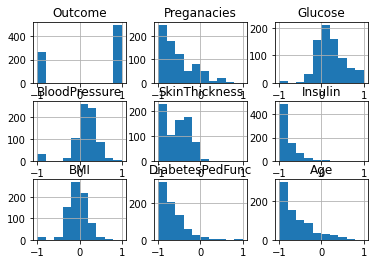

In [11]:
df.hist()
plt.show()

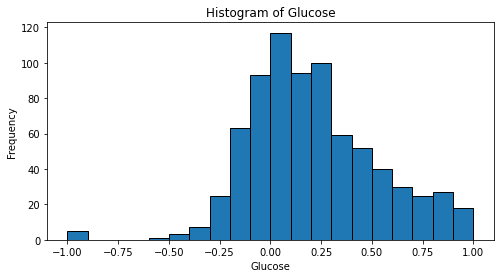

In [12]:
# Example 1: Histogram of Glucose
plt.figure(figsize=(8, 4))
plt.hist(df['Glucose'], bins=20, edgecolor='k')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.title('Histogram of Glucose')
plt.show()


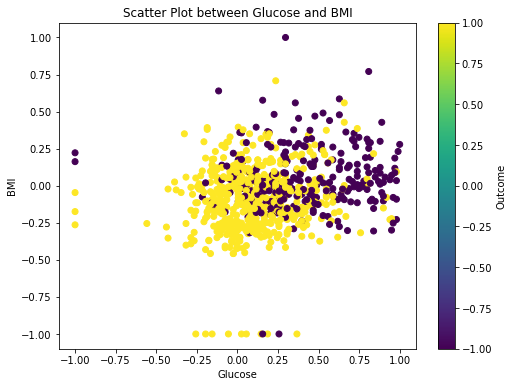

In [13]:
# Example 2: Scatter plot between Glucose and BMI
plt.figure(figsize=(8, 6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Outcome'], cmap='viridis')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Scatter Plot between Glucose and BMI')
plt.colorbar(label='Outcome')
plt.show()


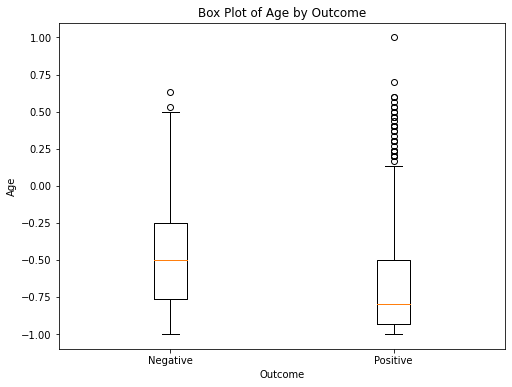

In [14]:

# Example 3: Box plot for Age by Outcome
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Outcome'] == -1]['Age'], df[df['Outcome'] == 1]['Age']], labels=['Negative', 'Positive'])
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Box Plot of Age by Outcome')
plt.show()

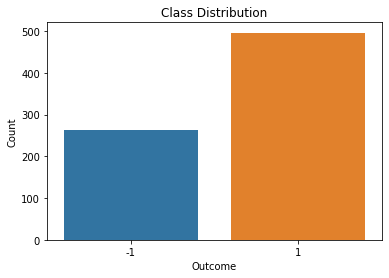

In [15]:
# Import seaborn for enhanced visualization
import seaborn as sns

# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


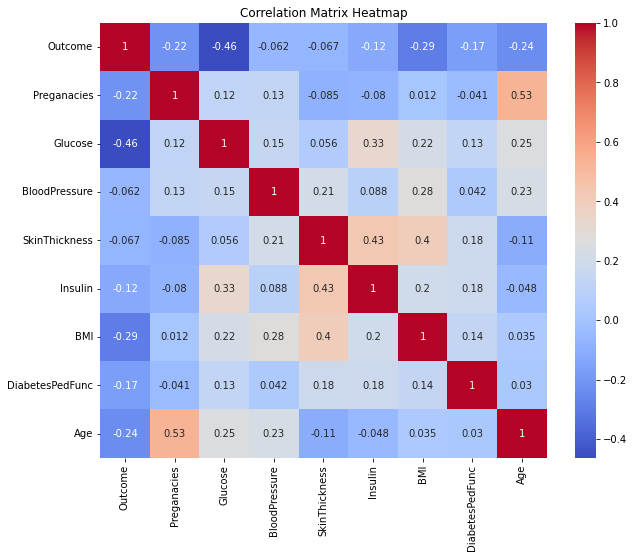

In [16]:
# 2. Correlation Matrix Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

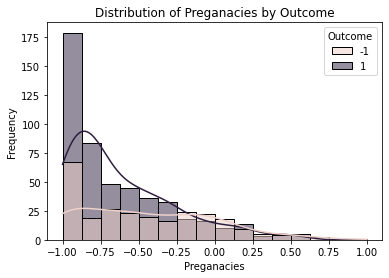

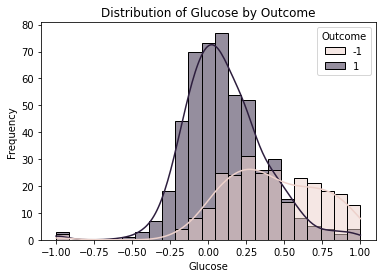

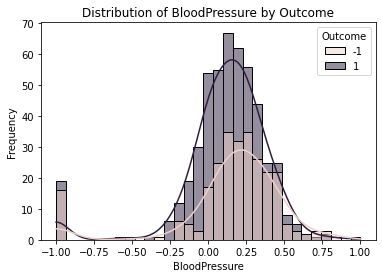

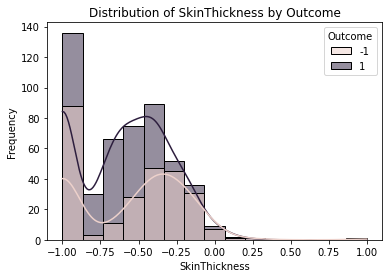

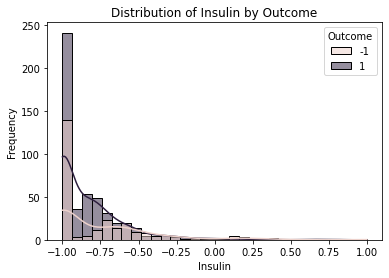

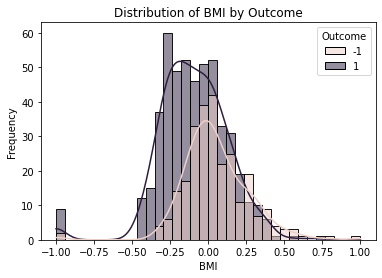

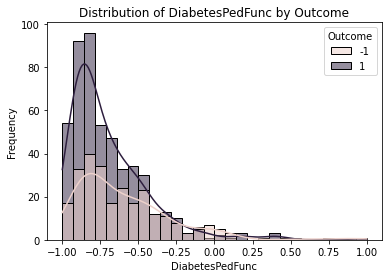

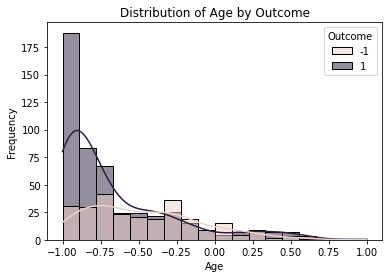

In [17]:
# 3. Feature Distributions
features = df.columns[1:]  # Exclude 'Outcome'
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature} by Outcome')
    plt.show()

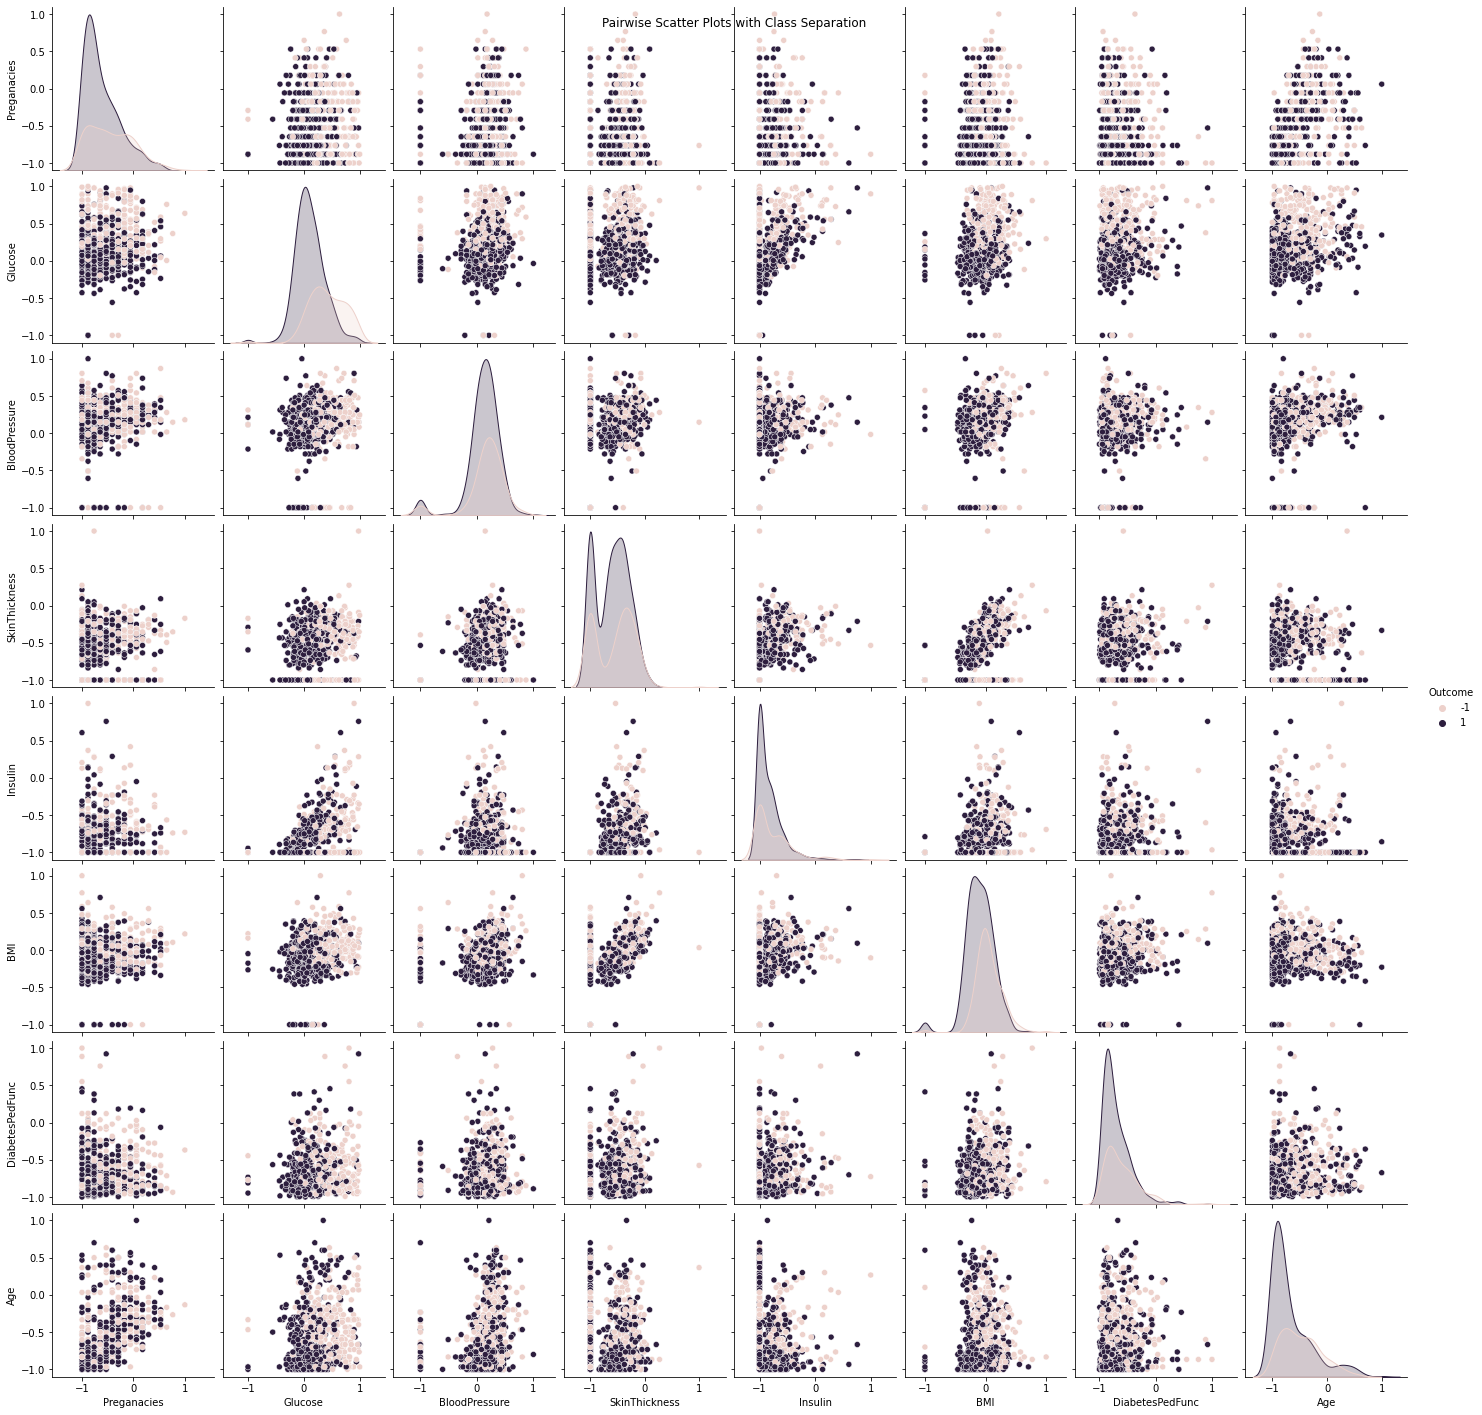

In [18]:
# 4. Pairwise Scatter Plots
sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots with Class Separation')
plt.show()

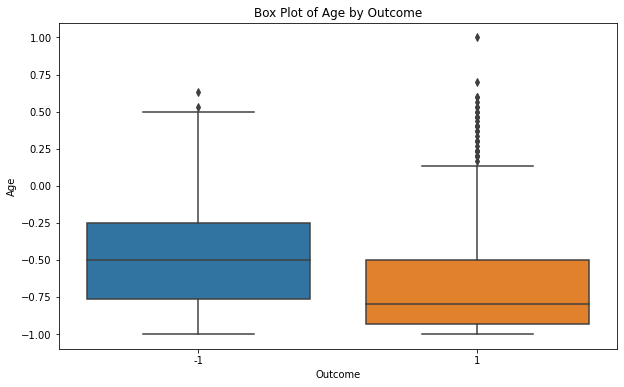

In [23]:
# 5. Box Plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Box Plot of Age by Outcome')
plt.show()

In [15]:
y = pd.DataFrame(df.iloc[:,0])
x = df.iloc[:,1:]
x = x.to_numpy()
y = y.to_numpy()

In [16]:
from random import seed
from sklearn.model_selection import train_test_split

In [17]:
# Split dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=20)

In [18]:
np.random.seed(20)
w = np.random.randn(9,1)* np.sqrt(1/1)
w

array([[ 0.88389311],
       [ 0.19586502],
       [ 0.35753652],
       [-2.34326191],
       [-1.08483259],
       [ 0.55969629],
       [ 0.93946935],
       [-0.97848104],
       [ 0.50309684]])

In [17]:
# predicts output given the rows and weights
def pred(row,w):
    # The first weight is always the bias
    atv = w[0]
    for i in range(len(row)):
        atv = atv + w[i+1]*row[i]
    return 1 if atv>=0 else -1

In [18]:
e = []
ss= []
def train(x_train, lrrate, epochs):
    for ep in range(epochs):
        global e 
        global ss 
        sum_square_error = 0
        for row, row1 in zip(x_train,y_train):
            prediction = pred(row,w)
            error = row1 - prediction
            w[0] = w[0] + lrrate*error
            sum_square_error = sum_square_error + ((error/2)**2)
            for i in range(len(row)):
                w[i+1]=w[i+1]+ lrrate*error*row[i]
        print('Epoch : {}'.format(ep),'\tError : {}'.format(sum_square_error))
        e.append(ep)
        ss.append(sum_square_error)
    return w

In [19]:
def perceptron(x_train, x_test, lrrate, epochs):
    weights=train(x_train, lrrate, epochs)
    pred1 = list()
    for row in x_test:
        predict = pred(row,weights)
        pred1.append(predict)
    return pred1

In [20]:
lrrate = 0.01
epochs = 100

In [21]:
def accuracy (pred, actual):
    right=0
    for i in range(len(pred)):
        if pred[i]==actual[i]:        
            right = right +1
    return right/len(pred) * 100

In [22]:
y_pred = perceptron(x_train, x_train, lrrate, epochs)

Epoch : 0 	Error : [247.]
Epoch : 1 	Error : [211.]
Epoch : 2 	Error : [190.]
Epoch : 3 	Error : [176.]
Epoch : 4 	Error : [172.]
Epoch : 5 	Error : [164.]
Epoch : 6 	Error : [182.]
Epoch : 7 	Error : [182.]
Epoch : 8 	Error : [194.]
Epoch : 9 	Error : [192.]
Epoch : 10 	Error : [192.]
Epoch : 11 	Error : [184.]
Epoch : 12 	Error : [192.]
Epoch : 13 	Error : [177.]
Epoch : 14 	Error : [184.]
Epoch : 15 	Error : [188.]
Epoch : 16 	Error : [185.]
Epoch : 17 	Error : [190.]
Epoch : 18 	Error : [190.]
Epoch : 19 	Error : [192.]
Epoch : 20 	Error : [182.]
Epoch : 21 	Error : [194.]
Epoch : 22 	Error : [180.]
Epoch : 23 	Error : [188.]
Epoch : 24 	Error : [196.]
Epoch : 25 	Error : [192.]
Epoch : 26 	Error : [188.]
Epoch : 27 	Error : [182.]
Epoch : 28 	Error : [190.]
Epoch : 29 	Error : [186.]
Epoch : 30 	Error : [180.]
Epoch : 31 	Error : [188.]
Epoch : 32 	Error : [188.]
Epoch : 33 	Error : [175.]
Epoch : 34 	Error : [193.]
Epoch : 35 	Error : [181.]
Epoch : 36 	Error : [198.]
Epoch : 37 

In [23]:
acc = accuracy(y_train,y_pred)
print('Train Accuracy :', acc)

Train Accuracy : 76.44151565074135


In [24]:
y = perceptron(x_train, x_test, lrrate, epochs)

Epoch : 0 	Error : [184.]
Epoch : 1 	Error : [177.]
Epoch : 2 	Error : [186.]
Epoch : 3 	Error : [193.]
Epoch : 4 	Error : [190.]
Epoch : 5 	Error : [180.]
Epoch : 6 	Error : [188.]
Epoch : 7 	Error : [176.]
Epoch : 8 	Error : [195.]
Epoch : 9 	Error : [189.]
Epoch : 10 	Error : [179.]
Epoch : 11 	Error : [207.]
Epoch : 12 	Error : [180.]
Epoch : 13 	Error : [186.]
Epoch : 14 	Error : [185.]
Epoch : 15 	Error : [181.]
Epoch : 16 	Error : [177.]
Epoch : 17 	Error : [186.]
Epoch : 18 	Error : [181.]
Epoch : 19 	Error : [186.]
Epoch : 20 	Error : [188.]
Epoch : 21 	Error : [175.]
Epoch : 22 	Error : [178.]
Epoch : 23 	Error : [182.]
Epoch : 24 	Error : [193.]
Epoch : 25 	Error : [182.]
Epoch : 26 	Error : [192.]
Epoch : 27 	Error : [174.]
Epoch : 28 	Error : [184.]
Epoch : 29 	Error : [193.]
Epoch : 30 	Error : [183.]
Epoch : 31 	Error : [186.]
Epoch : 32 	Error : [180.]
Epoch : 33 	Error : [182.]
Epoch : 34 	Error : [182.]
Epoch : 35 	Error : [192.]
Epoch : 36 	Error : [192.]
Epoch : 37 

Text(0, 0.5, 'Sum of squared error')

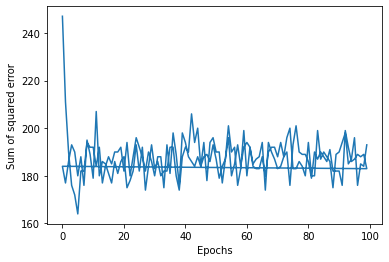

In [25]:
from matplotlib import pyplot as plt
plt.plot(e,ss)
plt.xlabel('Epochs')
plt.ylabel('Sum of squared error')

In [26]:
len(y)

152

In [27]:
acc = accuracy(y_test,y)
print('Test Accuracy :', acc)


Test Accuracy : 72.36842105263158


In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [29]:
cn = confusion_matrix(y_test, y)

In [30]:
cn

array([[22, 34],
       [ 8, 88]], dtype=int64)

In [31]:
print('classification report \n',classification_report(y_test, y))

classification report 
               precision    recall  f1-score   support

          -1       0.73      0.39      0.51        56
           1       0.72      0.92      0.81        96

    accuracy                           0.72       152
   macro avg       0.73      0.65      0.66       152
weighted avg       0.73      0.72      0.70       152



In [32]:
from sklearn.metrics import precision_recall_fscore_support as sc

In [33]:
precision,recall,f1,support = sc(y_test, y)
print('precision for both classes: {}'.format(precision))
print('recall for both classes: {}'.format(recall))
print('f1score for both classes: {}'.format(f1))

precision for both classes: [0.73333333 0.72131148]
recall for both classes: [0.39285714 0.91666667]
f1score for both classes: [0.51162791 0.80733945]


# ``Method 2``

In [34]:
# Xavier initialization
np.random.seed(20)
w = np.random.randn(9,1)* ((1/8)**0.5)
w

array([[ 0.31250341],
       [ 0.06924874],
       [ 0.12640825],
       [-0.82846819],
       [-0.38354624],
       [ 0.19788252],
       [ 0.33215257],
       [-0.34594529],
       [ 0.17787159]])

In [35]:
# predicts output given the rows and weights
def pred(row,w):
    # The first weight is always the bias
    atv = w[0]
    for i in range(len(row)):
        atv = np.tanh(atv + w[i+1]*row[i])
    return 1 if atv>=0 else -1

In [37]:
e = []
ss= []
def train(x_train, lrrate, epochs):
    for ep in range(epochs):
        global e 
        global ss
        sum_square_error = 0
        for row, row1 in zip(x_train,y_train):
            prediction = pred(row,w)
            error = row1 - prediction
            sum_square_error = sum_square_error + ((error/2)**2)
            for i in range(len(row)):
                der = 1-(np.tanh((w[0] + w[i+1]*row[i])))**2
                w[i+1]=w[i+1]+ lrrate*error*row[i]*der
            w[0] = w[0] + lrrate*error*der
        print('Epoch : {}'.format(ep),'\tError : {}'.format(sum_square_error))
        e.append(ep)
        ss.append(sum_square_error)
    return w

In [38]:
lrrate = 0.01
epochs = 500

In [39]:
def accuracy (pred, actual):
    right=0
    for i in range(len(pred)):
        if pred[i]==actual[i]:        
            right = right +1
    return right/len(pred) * 100

In [40]:
y_pred = perceptron(x_train, x_train, lrrate, epochs)

Epoch : 0 	Error : [227.]
Epoch : 1 	Error : [182.]
Epoch : 2 	Error : [170.]
Epoch : 3 	Error : [183.]
Epoch : 4 	Error : [182.]
Epoch : 5 	Error : [189.]
Epoch : 6 	Error : [187.]
Epoch : 7 	Error : [183.]
Epoch : 8 	Error : [184.]
Epoch : 9 	Error : [202.]
Epoch : 10 	Error : [185.]
Epoch : 11 	Error : [188.]
Epoch : 12 	Error : [186.]
Epoch : 13 	Error : [186.]
Epoch : 14 	Error : [185.]
Epoch : 15 	Error : [187.]
Epoch : 16 	Error : [193.]
Epoch : 17 	Error : [184.]
Epoch : 18 	Error : [191.]
Epoch : 19 	Error : [181.]
Epoch : 20 	Error : [201.]
Epoch : 21 	Error : [174.]
Epoch : 22 	Error : [178.]
Epoch : 23 	Error : [182.]
Epoch : 24 	Error : [195.]
Epoch : 25 	Error : [185.]
Epoch : 26 	Error : [203.]
Epoch : 27 	Error : [188.]
Epoch : 28 	Error : [201.]
Epoch : 29 	Error : [184.]
Epoch : 30 	Error : [190.]
Epoch : 31 	Error : [180.]
Epoch : 32 	Error : [181.]
Epoch : 33 	Error : [190.]
Epoch : 34 	Error : [197.]
Epoch : 35 	Error : [175.]
Epoch : 36 	Error : [176.]
Epoch : 37 

Epoch : 298 	Error : [190.]
Epoch : 299 	Error : [183.]
Epoch : 300 	Error : [198.]
Epoch : 301 	Error : [181.]
Epoch : 302 	Error : [188.]
Epoch : 303 	Error : [180.]
Epoch : 304 	Error : [188.]
Epoch : 305 	Error : [182.]
Epoch : 306 	Error : [176.]
Epoch : 307 	Error : [180.]
Epoch : 308 	Error : [174.]
Epoch : 309 	Error : [188.]
Epoch : 310 	Error : [193.]
Epoch : 311 	Error : [188.]
Epoch : 312 	Error : [180.]
Epoch : 313 	Error : [189.]
Epoch : 314 	Error : [184.]
Epoch : 315 	Error : [192.]
Epoch : 316 	Error : [189.]
Epoch : 317 	Error : [191.]
Epoch : 318 	Error : [185.]
Epoch : 319 	Error : [182.]
Epoch : 320 	Error : [186.]
Epoch : 321 	Error : [180.]
Epoch : 322 	Error : [194.]
Epoch : 323 	Error : [192.]
Epoch : 324 	Error : [174.]
Epoch : 325 	Error : [196.]
Epoch : 326 	Error : [182.]
Epoch : 327 	Error : [184.]
Epoch : 328 	Error : [181.]
Epoch : 329 	Error : [188.]
Epoch : 330 	Error : [179.]
Epoch : 331 	Error : [192.]
Epoch : 332 	Error : [183.]
Epoch : 333 	Error :

In [41]:
acc_train = accuracy(y_train,y_pred)
print('Train Accuracy :', acc_train)

Train Accuracy : 76.77100494233937


In [42]:
y = perceptron(x_train, x_test, lrrate, epochs)

Epoch : 0 	Error : [184.]
Epoch : 1 	Error : [194.]
Epoch : 2 	Error : [194.]
Epoch : 3 	Error : [183.]
Epoch : 4 	Error : [201.]
Epoch : 5 	Error : [183.]
Epoch : 6 	Error : [194.]
Epoch : 7 	Error : [203.]
Epoch : 8 	Error : [193.]
Epoch : 9 	Error : [193.]
Epoch : 10 	Error : [173.]
Epoch : 11 	Error : [194.]
Epoch : 12 	Error : [182.]
Epoch : 13 	Error : [188.]
Epoch : 14 	Error : [190.]
Epoch : 15 	Error : [181.]
Epoch : 16 	Error : [172.]
Epoch : 17 	Error : [183.]
Epoch : 18 	Error : [183.]
Epoch : 19 	Error : [187.]
Epoch : 20 	Error : [194.]
Epoch : 21 	Error : [190.]
Epoch : 22 	Error : [190.]
Epoch : 23 	Error : [186.]
Epoch : 24 	Error : [202.]
Epoch : 25 	Error : [186.]
Epoch : 26 	Error : [185.]
Epoch : 27 	Error : [176.]
Epoch : 28 	Error : [184.]
Epoch : 29 	Error : [186.]
Epoch : 30 	Error : [189.]
Epoch : 31 	Error : [177.]
Epoch : 32 	Error : [196.]
Epoch : 33 	Error : [197.]
Epoch : 34 	Error : [202.]
Epoch : 35 	Error : [179.]
Epoch : 36 	Error : [200.]
Epoch : 37 

Epoch : 298 	Error : [187.]
Epoch : 299 	Error : [188.]
Epoch : 300 	Error : [187.]
Epoch : 301 	Error : [186.]
Epoch : 302 	Error : [180.]
Epoch : 303 	Error : [188.]
Epoch : 304 	Error : [186.]
Epoch : 305 	Error : [184.]
Epoch : 306 	Error : [190.]
Epoch : 307 	Error : [190.]
Epoch : 308 	Error : [194.]
Epoch : 309 	Error : [187.]
Epoch : 310 	Error : [183.]
Epoch : 311 	Error : [179.]
Epoch : 312 	Error : [188.]
Epoch : 313 	Error : [187.]
Epoch : 314 	Error : [185.]
Epoch : 315 	Error : [180.]
Epoch : 316 	Error : [189.]
Epoch : 317 	Error : [182.]
Epoch : 318 	Error : [196.]
Epoch : 319 	Error : [181.]
Epoch : 320 	Error : [186.]
Epoch : 321 	Error : [191.]
Epoch : 322 	Error : [180.]
Epoch : 323 	Error : [196.]
Epoch : 324 	Error : [190.]
Epoch : 325 	Error : [197.]
Epoch : 326 	Error : [184.]
Epoch : 327 	Error : [194.]
Epoch : 328 	Error : [182.]
Epoch : 329 	Error : [194.]
Epoch : 330 	Error : [194.]
Epoch : 331 	Error : [190.]
Epoch : 332 	Error : [194.]
Epoch : 333 	Error :

Text(0, 0.5, 'Sum of squared error')

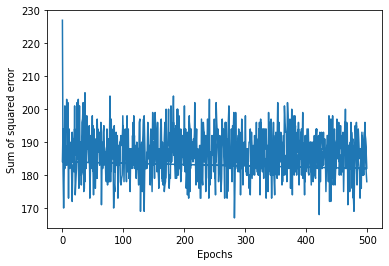

In [43]:
plt.plot(e,ss)
plt.xlabel('Epochs')
plt.ylabel('Sum of squared error')

In [44]:
acc = accuracy(y_test,y)
print('Test Accuracy :', acc)

Test Accuracy : 75.6578947368421


In [45]:
cn = confusion_matrix(y_test, y)
cn

array([[37, 19],
       [18, 78]], dtype=int64)

In [46]:
print('classification report \n',classification_report(y_test, y))

classification report 
               precision    recall  f1-score   support

          -1       0.67      0.66      0.67        56
           1       0.80      0.81      0.81        96

    accuracy                           0.76       152
   macro avg       0.74      0.74      0.74       152
weighted avg       0.76      0.76      0.76       152



In [47]:
precision,recall,f1,support = sc(y_test, y)
print('precision for both classes: {}'.format(precision))
print('recall for both classes: {}'.format(recall))
print('f1score for both classes: {}'.format(f1))

precision for both classes: [0.67272727 0.80412371]
recall for both classes: [0.66071429 0.8125    ]
f1score for both classes: [0.66666667 0.80829016]
